<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/_BP_hv3_4(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4096      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 2s 14ms/step - loss: 12000.9102 - val_loss: 11624.1270
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 10894.3906 - val_loss: 10368.0205
Epoch 3/500
165/165 [==============================] - 2s 13ms/step - loss: 9376.7197 - val_loss: 8048.0435
Epoch 4/500
165/165 [==============================] - 2s 13ms/step - loss: 7541.8916 - val_loss: 5947.2031
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 5558.8369 - val_loss: 6252.6172
Epoch 6/500
165/165 [==============================] - 2s 13ms/step - loss: 3661.9639 - val_loss: 3170.1213
Epoch 7/500
165/165 [==============================] - 1s 3ms/step - loss: 2125.8474 - val_loss: 1358.4507
Epoch 8/500
165/165 [==============================] - 2s 13ms/step - loss: 966.8816 - val_loss: 729.4528
Epoch 9/500
165/165 [==============================] - 1s 3ms/step - loss: 407.8870 - val_loss: 520.0372
Epoch 10/500
165/165 [==========

165/165 [==============================] - 1s 3ms/step - loss: 67.0498 - val_loss: 97.3172
Epoch 79/500
165/165 [==============================] - 8s 46ms/step - loss: 67.2626 - val_loss: 99.3115
Epoch 80/500
165/165 [==============================] - 1s 3ms/step - loss: 67.2388 - val_loss: 117.5398
Epoch 81/500
165/165 [==============================] - 2s 13ms/step - loss: 67.0493 - val_loss: 106.6342
Epoch 82/500
165/165 [==============================] - 0s 3ms/step - loss: 66.9315 - val_loss: 116.3897
Epoch 83/500
165/165 [==============================] - 5s 32ms/step - loss: 66.7527 - val_loss: 97.6127
Epoch 84/500
165/165 [==============================] - 3s 18ms/step - loss: 66.8639 - val_loss: 108.0669
Epoch 85/500
165/165 [==============================] - 1s 3ms/step - loss: 66.7037 - val_loss: 98.3937
Epoch 86/500
165/165 [==============================] - 8s 46ms/step - loss: 66.8163 - val_loss: 94.2601
Epoch 87/500
165/165 [==============================] - 1s 3ms/step 

165/165 [==============================] - 2s 13ms/step - loss: 63.1771 - val_loss: 139.2584
Epoch 156/500
165/165 [==============================] - 1s 3ms/step - loss: 63.2857 - val_loss: 96.2887
Epoch 157/500
165/165 [==============================] - 2s 13ms/step - loss: 62.9561 - val_loss: 97.0259
Epoch 158/500
165/165 [==============================] - 1s 3ms/step - loss: 63.2013 - val_loss: 103.4742
Epoch 159/500
165/165 [==============================] - 2s 13ms/step - loss: 63.1938 - val_loss: 96.3056
Epoch 160/500
165/165 [==============================] - 2s 13ms/step - loss: 63.0661 - val_loss: 97.5276
Epoch 161/500
165/165 [==============================] - 0s 3ms/step - loss: 62.9620 - val_loss: 108.3971
Epoch 162/500
165/165 [==============================] - 0s 3ms/step - loss: 62.9626 - val_loss: 99.4430
Epoch 163/500
165/165 [==============================] - 1s 4ms/step - loss: 63.0392 - val_loss: 116.3431
Epoch 164/500
165/165 [==============================] - 2s 1

165/165 [==============================] - 2s 13ms/step - loss: 61.1878 - val_loss: 100.0319
Epoch 233/500
165/165 [==============================] - 2s 13ms/step - loss: 60.9392 - val_loss: 100.4928
Epoch 234/500
165/165 [==============================] - 1s 3ms/step - loss: 60.9285 - val_loss: 100.5883
Epoch 235/500
165/165 [==============================] - 5s 30ms/step - loss: 61.0182 - val_loss: 91.4781
Epoch 236/500
165/165 [==============================] - 3s 19ms/step - loss: 61.0044 - val_loss: 104.2664
Epoch 237/500
165/165 [==============================] - 1s 4ms/step - loss: 61.0194 - val_loss: 99.2067
Epoch 238/500
165/165 [==============================] - 2s 13ms/step - loss: 60.9560 - val_loss: 113.8857
Epoch 239/500
165/165 [==============================] - 1s 3ms/step - loss: 61.0226 - val_loss: 96.4053
Epoch 240/500
165/165 [==============================] - 8s 46ms/step - loss: 61.0127 - val_loss: 113.1723
Epoch 241/500
165/165 [==============================] - 

165/165 [==============================] - 2s 12ms/step - loss: 59.7387 - val_loss: 116.6829
Epoch 310/500
165/165 [==============================] - 1s 3ms/step - loss: 59.8364 - val_loss: 93.1298
Epoch 311/500
165/165 [==============================] - 2s 13ms/step - loss: 59.6780 - val_loss: 118.8923
Epoch 312/500
165/165 [==============================] - 1s 3ms/step - loss: 59.7253 - val_loss: 111.2917
Epoch 313/500
165/165 [==============================] - 2s 13ms/step - loss: 59.5460 - val_loss: 98.2766
Epoch 314/500
165/165 [==============================] - 2s 13ms/step - loss: 60.0890 - val_loss: 107.9115
Epoch 315/500
165/165 [==============================] - 1s 3ms/step - loss: 59.7004 - val_loss: 103.7641
Epoch 316/500
165/165 [==============================] - 2s 12ms/step - loss: 59.8156 - val_loss: 134.6186
Epoch 317/500
165/165 [==============================] - 0s 3ms/step - loss: 59.5471 - val_loss: 119.8555
Epoch 318/500
165/165 [==============================] - 

165/165 [==============================] - 1s 3ms/step - loss: 58.7788 - val_loss: 104.1271
Epoch 387/500
165/165 [==============================] - 2s 12ms/step - loss: 58.9000 - val_loss: 109.0943
Epoch 388/500
165/165 [==============================] - 1s 3ms/step - loss: 58.8754 - val_loss: 98.8144
Epoch 389/500
165/165 [==============================] - 2s 13ms/step - loss: 58.8462 - val_loss: 94.4361
Epoch 390/500
165/165 [==============================] - 1s 3ms/step - loss: 58.7836 - val_loss: 99.3101
Epoch 391/500
165/165 [==============================] - 2s 13ms/step - loss: 58.8069 - val_loss: 103.1671
Epoch 392/500
165/165 [==============================] - 2s 12ms/step - loss: 58.8684 - val_loss: 105.7145
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 58.6839 - val_loss: 94.7652
Epoch 394/500
165/165 [==============================] - 2s 12ms/step - loss: 58.8726 - val_loss: 100.3923
Epoch 395/500
165/165 [==============================] - 0s

165/165 [==============================] - 0s 3ms/step - loss: 58.2179 - val_loss: 95.1478
Epoch 464/500
165/165 [==============================] - 2s 12ms/step - loss: 58.3069 - val_loss: 97.0059
Epoch 465/500
165/165 [==============================] - 1s 3ms/step - loss: 58.3291 - val_loss: 93.1422
Epoch 466/500
165/165 [==============================] - 2s 13ms/step - loss: 57.9231 - val_loss: 106.4572
Epoch 467/500
165/165 [==============================] - 2s 13ms/step - loss: 58.2394 - val_loss: 99.3332
Epoch 468/500
165/165 [==============================] - 1s 3ms/step - loss: 58.1610 - val_loss: 96.8926
Epoch 469/500
165/165 [==============================] - 2s 12ms/step - loss: 58.3840 - val_loss: 101.5085
Epoch 470/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0554 - val_loss: 99.4118
Epoch 471/500
165/165 [==============================] - 2s 12ms/step - loss: 58.1630 - val_loss: 98.9088
Epoch 472/500
165/165 [==============================] - 0s 3m

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.8179448189675153 
MAE:  7.551773536762022 
SD:  10.036203179756088


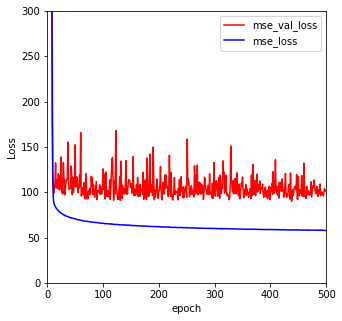

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                4096      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 3s 21ms/step - loss: 11888.9053 - val_loss: 11789.3369
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 10753.1201 - val_loss: 9844.3701
Epoch 3/500
165/165 [==============================] - 2s 13ms/step - loss: 9111.1611 - val_loss: 8208.1318
Epoch 4/500
165/165 [==============================] - 1s 3ms/step - loss: 7000.3188 - val_loss: 7375.1465
Epoch 5/500
165/165 [==============================] - 8s 46ms/step - loss: 4807.1309 - val_loss: 2908.3450
Epoch 6/500
165/165 [==============================] - 1s 3ms/step - loss: 2919.4094 - val_loss: 2280.4607
Epoch 7/500
165/165 [==============================] - 2s 13ms/step - loss: 1559.3119 - val_loss: 1369.2844
Epoch 8/500
165/165 [==============================] - 1s 3ms/step - loss: 738.7524 - val_loss: 965.2203
Epoch 9/500
165/165 [==============================] - 2s 13ms/step - loss: 331.7408 - val_loss: 296.2718
Epoch 10/500
165/165 [===========

Epoch 79/500
165/165 [==============================] - 1s 3ms/step - loss: 66.8407 - val_loss: 106.5033
Epoch 80/500
165/165 [==============================] - 1s 3ms/step - loss: 66.9025 - val_loss: 106.5300
Epoch 81/500
165/165 [==============================] - 1s 3ms/step - loss: 66.4096 - val_loss: 123.9581
Epoch 82/500
165/165 [==============================] - 1s 3ms/step - loss: 66.6191 - val_loss: 207.0156
Epoch 83/500
165/165 [==============================] - 1s 3ms/step - loss: 66.4459 - val_loss: 143.5135
Epoch 84/500
165/165 [==============================] - 1s 3ms/step - loss: 66.3494 - val_loss: 102.8227
Epoch 85/500
165/165 [==============================] - 1s 3ms/step - loss: 66.4224 - val_loss: 154.1530
Epoch 86/500
165/165 [==============================] - 1s 3ms/step - loss: 66.5155 - val_loss: 111.4682
Epoch 87/500
165/165 [==============================] - 1s 3ms/step - loss: 66.1182 - val_loss: 102.4943
Epoch 88/500
165/165 [==============================] -

165/165 [==============================] - 1s 3ms/step - loss: 62.1875 - val_loss: 100.1698
Epoch 157/500
165/165 [==============================] - 1s 3ms/step - loss: 62.2255 - val_loss: 128.8777
Epoch 158/500
165/165 [==============================] - 1s 3ms/step - loss: 62.0780 - val_loss: 94.7656
Epoch 159/500
165/165 [==============================] - 1s 3ms/step - loss: 61.9944 - val_loss: 110.8736
Epoch 160/500
165/165 [==============================] - 1s 3ms/step - loss: 62.2888 - val_loss: 100.6618
Epoch 161/500
165/165 [==============================] - 1s 3ms/step - loss: 62.0028 - val_loss: 98.0409
Epoch 162/500
165/165 [==============================] - 1s 3ms/step - loss: 62.1359 - val_loss: 93.9288
Epoch 163/500
165/165 [==============================] - 1s 3ms/step - loss: 62.0443 - val_loss: 101.6166
Epoch 164/500
165/165 [==============================] - 1s 3ms/step - loss: 62.0014 - val_loss: 109.4657
Epoch 165/500
165/165 [==============================] - 1s 3ms

Epoch 234/500
165/165 [==============================] - 1s 3ms/step - loss: 60.3259 - val_loss: 100.9337
Epoch 235/500
165/165 [==============================] - 1s 3ms/step - loss: 60.1878 - val_loss: 97.6989
Epoch 236/500
165/165 [==============================] - 1s 3ms/step - loss: 60.2884 - val_loss: 103.7059
Epoch 237/500
165/165 [==============================] - 1s 3ms/step - loss: 60.3177 - val_loss: 103.0255
Epoch 238/500
165/165 [==============================] - 1s 3ms/step - loss: 60.0649 - val_loss: 106.3880
Epoch 239/500
165/165 [==============================] - 1s 3ms/step - loss: 60.0600 - val_loss: 94.5812
Epoch 240/500
165/165 [==============================] - 1s 3ms/step - loss: 60.2125 - val_loss: 112.2607
Epoch 241/500
165/165 [==============================] - 1s 3ms/step - loss: 60.1299 - val_loss: 101.0424
Epoch 242/500
165/165 [==============================] - 1s 3ms/step - loss: 60.1697 - val_loss: 113.3643
Epoch 243/500
165/165 [=========================

165/165 [==============================] - 1s 3ms/step - loss: 59.0663 - val_loss: 88.6380
Epoch 312/500
165/165 [==============================] - 1s 3ms/step - loss: 58.9798 - val_loss: 93.6754
Epoch 313/500
165/165 [==============================] - 1s 3ms/step - loss: 58.9873 - val_loss: 99.2697
Epoch 314/500
165/165 [==============================] - 1s 3ms/step - loss: 59.0682 - val_loss: 107.0062
Epoch 315/500
165/165 [==============================] - 1s 3ms/step - loss: 59.0652 - val_loss: 94.4094
Epoch 316/500
165/165 [==============================] - 1s 3ms/step - loss: 58.7497 - val_loss: 99.6013
Epoch 317/500
165/165 [==============================] - 1s 3ms/step - loss: 58.9267 - val_loss: 90.7216
Epoch 318/500
165/165 [==============================] - 1s 3ms/step - loss: 59.1644 - val_loss: 113.0949
Epoch 319/500
165/165 [==============================] - 0s 3ms/step - loss: 58.9961 - val_loss: 97.5992
Epoch 320/500
165/165 [==============================] - 0s 3ms/ste

Epoch 389/500
165/165 [==============================] - 1s 3ms/step - loss: 58.2703 - val_loss: 96.6037
Epoch 390/500
165/165 [==============================] - 1s 3ms/step - loss: 58.2876 - val_loss: 95.3726
Epoch 391/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0520 - val_loss: 102.1599
Epoch 392/500
165/165 [==============================] - 1s 3ms/step - loss: 58.1592 - val_loss: 96.3519
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 58.1380 - val_loss: 89.8815
Epoch 394/500
165/165 [==============================] - 1s 3ms/step - loss: 58.4069 - val_loss: 99.3501
Epoch 395/500
165/165 [==============================] - 1s 3ms/step - loss: 58.1936 - val_loss: 103.4011
Epoch 396/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0532 - val_loss: 94.0873
Epoch 397/500
165/165 [==============================] - 1s 3ms/step - loss: 58.1532 - val_loss: 96.7682
Epoch 398/500
165/165 [==============================

Epoch 467/500
165/165 [==============================] - 1s 3ms/step - loss: 57.5359 - val_loss: 90.7758
Epoch 468/500
165/165 [==============================] - 1s 3ms/step - loss: 57.5924 - val_loss: 103.0649
Epoch 469/500
165/165 [==============================] - 1s 3ms/step - loss: 57.5027 - val_loss: 94.0527
Epoch 470/500
165/165 [==============================] - 1s 3ms/step - loss: 57.6281 - val_loss: 99.8786
Epoch 471/500
165/165 [==============================] - 1s 3ms/step - loss: 57.6411 - val_loss: 99.6534
Epoch 472/500
165/165 [==============================] - 1s 3ms/step - loss: 57.4634 - val_loss: 92.8266
Epoch 473/500
165/165 [==============================] - 1s 3ms/step - loss: 57.7135 - val_loss: 96.0701
Epoch 474/500
165/165 [==============================] - 1s 3ms/step - loss: 57.6976 - val_loss: 89.9869
Epoch 475/500
165/165 [==============================] - 1s 3ms/step - loss: 57.4646 - val_loss: 93.8229
Epoch 476/500
165/165 [==============================]

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  2.2022495201934826 
MAE:  7.664580199049766 
SD:  9.920786903511084


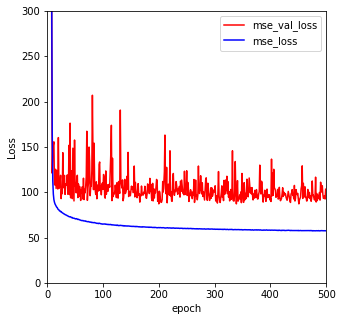

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32)                128       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32)                128       
_________________________________________________________________
activation_9 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 1s 4ms/step - loss: 11921.5967 - val_loss: 11914.0596
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 10798.2383 - val_loss: 10225.0400
Epoch 3/500
165/165 [==============================] - 1s 3ms/step - loss: 9266.3203 - val_loss: 7013.2324
Epoch 4/500
165/165 [==============================] - 1s 3ms/step - loss: 7340.2319 - val_loss: 5055.4087
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 5235.4189 - val_loss: 4009.9504
Epoch 6/500
165/165 [==============================] - 1s 3ms/step - loss: 3266.5889 - val_loss: 3378.9292
Epoch 7/500
165/165 [==============================] - 1s 3ms/step - loss: 1687.8630 - val_loss: 2366.2112
Epoch 8/500
165/165 [==============================] - 1s 3ms/step - loss: 761.4007 - val_loss: 809.6404
Epoch 9/500
165/165 [==============================] - 1s 3ms/step - loss: 314.3580 - val_loss: 202.4307
Epoch 10/500
165/165 [===============

Epoch 79/500
165/165 [==============================] - 1s 3ms/step - loss: 67.4401 - val_loss: 101.1477
Epoch 80/500
165/165 [==============================] - 1s 3ms/step - loss: 67.3505 - val_loss: 120.0321
Epoch 81/500
165/165 [==============================] - 1s 3ms/step - loss: 66.9178 - val_loss: 93.9108
Epoch 82/500
165/165 [==============================] - 1s 3ms/step - loss: 67.1652 - val_loss: 125.7929
Epoch 83/500
165/165 [==============================] - 1s 3ms/step - loss: 66.9660 - val_loss: 104.7236
Epoch 84/500
165/165 [==============================] - 1s 3ms/step - loss: 67.0791 - val_loss: 94.1339
Epoch 85/500
165/165 [==============================] - 1s 3ms/step - loss: 66.9478 - val_loss: 100.2448
Epoch 86/500
165/165 [==============================] - 1s 3ms/step - loss: 66.6492 - val_loss: 100.0839
Epoch 87/500
165/165 [==============================] - 1s 3ms/step - loss: 66.7996 - val_loss: 98.8350
Epoch 88/500
165/165 [==============================] - 1s

165/165 [==============================] - 1s 3ms/step - loss: 62.8478 - val_loss: 113.3117
Epoch 157/500
165/165 [==============================] - 1s 3ms/step - loss: 62.8161 - val_loss: 97.5249
Epoch 158/500
165/165 [==============================] - 1s 3ms/step - loss: 62.7164 - val_loss: 102.6506
Epoch 159/500
165/165 [==============================] - 1s 3ms/step - loss: 62.6218 - val_loss: 141.4676
Epoch 160/500
165/165 [==============================] - 1s 3ms/step - loss: 62.8898 - val_loss: 104.0713
Epoch 161/500
165/165 [==============================] - 1s 3ms/step - loss: 62.6775 - val_loss: 96.2428
Epoch 162/500
165/165 [==============================] - 1s 3ms/step - loss: 62.6893 - val_loss: 114.8573
Epoch 163/500
165/165 [==============================] - 1s 3ms/step - loss: 62.6658 - val_loss: 103.8433
Epoch 164/500
165/165 [==============================] - 1s 3ms/step - loss: 62.5151 - val_loss: 97.1329
Epoch 165/500
165/165 [==============================] - 1s 3ms

165/165 [==============================] - 1s 3ms/step - loss: 60.7260 - val_loss: 132.8065
Epoch 234/500
165/165 [==============================] - 1s 3ms/step - loss: 60.8963 - val_loss: 98.4798
Epoch 235/500
165/165 [==============================] - 1s 3ms/step - loss: 60.7146 - val_loss: 109.1016
Epoch 236/500
165/165 [==============================] - 1s 4ms/step - loss: 60.6127 - val_loss: 106.7931
Epoch 237/500
165/165 [==============================] - 1s 3ms/step - loss: 60.5703 - val_loss: 98.7973
Epoch 238/500
165/165 [==============================] - 1s 3ms/step - loss: 60.4743 - val_loss: 124.5264
Epoch 239/500
165/165 [==============================] - 1s 3ms/step - loss: 60.7043 - val_loss: 96.7856
Epoch 240/500
165/165 [==============================] - 1s 3ms/step - loss: 60.6379 - val_loss: 132.3440
Epoch 241/500
165/165 [==============================] - 1s 3ms/step - loss: 60.5279 - val_loss: 98.5235
Epoch 242/500
165/165 [==============================] - 1s 3ms/

165/165 [==============================] - 1s 3ms/step - loss: 59.6602 - val_loss: 105.1903
Epoch 311/500
165/165 [==============================] - 1s 4ms/step - loss: 59.5654 - val_loss: 105.4706
Epoch 312/500
165/165 [==============================] - 1s 3ms/step - loss: 59.5034 - val_loss: 100.4348
Epoch 313/500
165/165 [==============================] - 1s 3ms/step - loss: 59.4507 - val_loss: 115.2472
Epoch 314/500
165/165 [==============================] - 1s 4ms/step - loss: 59.6594 - val_loss: 100.5680
Epoch 315/500
165/165 [==============================] - 1s 3ms/step - loss: 59.4368 - val_loss: 94.3356
Epoch 316/500
165/165 [==============================] - 1s 4ms/step - loss: 59.3565 - val_loss: 111.1707
Epoch 317/500
165/165 [==============================] - 1s 3ms/step - loss: 59.3569 - val_loss: 94.7209
Epoch 318/500
165/165 [==============================] - 1s 4ms/step - loss: 59.6672 - val_loss: 99.8301
Epoch 319/500
165/165 [==============================] - 1s 3ms

165/165 [==============================] - 1s 3ms/step - loss: 58.7911 - val_loss: 102.4703
Epoch 388/500
165/165 [==============================] - 1s 3ms/step - loss: 58.6763 - val_loss: 117.9995
Epoch 389/500
165/165 [==============================] - 1s 3ms/step - loss: 58.6626 - val_loss: 104.7178
Epoch 390/500
165/165 [==============================] - 1s 3ms/step - loss: 58.7052 - val_loss: 100.6233
Epoch 391/500
165/165 [==============================] - 1s 3ms/step - loss: 58.6291 - val_loss: 95.3662
Epoch 392/500
165/165 [==============================] - 1s 3ms/step - loss: 58.6899 - val_loss: 94.9072
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 58.7022 - val_loss: 103.3497
Epoch 394/500
165/165 [==============================] - 1s 3ms/step - loss: 58.5147 - val_loss: 110.2233
Epoch 395/500
165/165 [==============================] - 1s 3ms/step - loss: 58.7017 - val_loss: 153.3262
Epoch 396/500
165/165 [==============================] - 1s 3m

165/165 [==============================] - 1s 3ms/step - loss: 58.1035 - val_loss: 95.2374
Epoch 465/500
165/165 [==============================] - 1s 3ms/step - loss: 57.9749 - val_loss: 93.4273
Epoch 466/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0247 - val_loss: 106.7766
Epoch 467/500
165/165 [==============================] - 1s 3ms/step - loss: 57.8009 - val_loss: 96.1944
Epoch 468/500
165/165 [==============================] - 1s 3ms/step - loss: 57.9230 - val_loss: 99.1846
Epoch 469/500
165/165 [==============================] - 1s 3ms/step - loss: 57.9943 - val_loss: 95.4306
Epoch 470/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0198 - val_loss: 103.7376
Epoch 471/500
165/165 [==============================] - 1s 3ms/step - loss: 58.0383 - val_loss: 101.0753
Epoch 472/500
165/165 [==============================] - 1s 4ms/step - loss: 57.9336 - val_loss: 97.9323
Epoch 473/500
165/165 [==============================] - 1s 3ms/st

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  5.226464691869462 
MAE:  8.599506852715681 
SD:  9.8548149264056


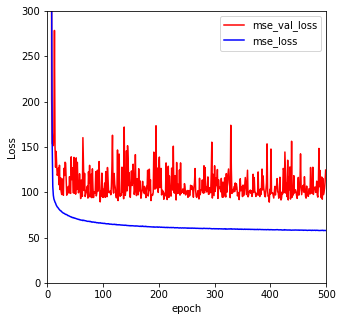

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  2.7488863436768205 
Ensemble_std:  9.937268336557592


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32)                128       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32)                128       
_________________________________________________________________
activation_13 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 1s 4ms/step - loss: 3531.4404 - val_loss: 3460.0598
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 3013.0972 - val_loss: 3071.7036
Epoch 3/500
165/165 [==============================] - 1s 4ms/step - loss: 2333.8103 - val_loss: 2337.7554
Epoch 4/500
165/165 [==============================] - 1s 3ms/step - loss: 1560.9373 - val_loss: 1066.5610
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 854.9070 - val_loss: 687.5303
Epoch 6/500
165/165 [==============================] - 1s 3ms/step - loss: 360.8759 - val_loss: 194.8224
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 116.9680 - val_loss: 178.4025
Epoch 8/500
165/165 [==============================] - 1s 3ms/step - loss: 48.1225 - val_loss: 58.3140
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 35.4232 - val_loss: 57.4189
Epoch 10/500
165/165 [=============================

165/165 [==============================] - 1s 3ms/step - loss: 25.2072 - val_loss: 47.3638
Epoch 80/500
165/165 [==============================] - 1s 3ms/step - loss: 25.2148 - val_loss: 46.7577
Epoch 81/500
165/165 [==============================] - 1s 4ms/step - loss: 25.0875 - val_loss: 45.2552
Epoch 82/500
165/165 [==============================] - 1s 3ms/step - loss: 25.2158 - val_loss: 39.3338
Epoch 83/500
165/165 [==============================] - 1s 3ms/step - loss: 25.1607 - val_loss: 39.8156
Epoch 84/500
165/165 [==============================] - 1s 3ms/step - loss: 25.0114 - val_loss: 39.3698
Epoch 85/500
165/165 [==============================] - 1s 3ms/step - loss: 25.0465 - val_loss: 39.3900
Epoch 86/500
165/165 [==============================] - 1s 3ms/step - loss: 25.0530 - val_loss: 37.0755
Epoch 87/500
165/165 [==============================] - 1s 3ms/step - loss: 24.9643 - val_loss: 40.1636
Epoch 88/500
165/165 [==============================] - 1s 3ms/step - loss: 2

165/165 [==============================] - 1s 3ms/step - loss: 23.7023 - val_loss: 42.5050
Epoch 158/500
165/165 [==============================] - 1s 3ms/step - loss: 23.6638 - val_loss: 40.0257
Epoch 159/500
165/165 [==============================] - 1s 4ms/step - loss: 23.6627 - val_loss: 38.9038
Epoch 160/500
165/165 [==============================] - 1s 4ms/step - loss: 23.6856 - val_loss: 37.5752
Epoch 161/500
165/165 [==============================] - 1s 4ms/step - loss: 23.5344 - val_loss: 40.5031
Epoch 162/500
165/165 [==============================] - 1s 3ms/step - loss: 23.6384 - val_loss: 36.4698
Epoch 163/500
165/165 [==============================] - 1s 3ms/step - loss: 23.6806 - val_loss: 37.8909
Epoch 164/500
165/165 [==============================] - 1s 3ms/step - loss: 23.5221 - val_loss: 35.5869
Epoch 165/500
165/165 [==============================] - 1s 4ms/step - loss: 23.6242 - val_loss: 36.0256
Epoch 166/500
165/165 [==============================] - 1s 3ms/step 

Epoch 235/500
165/165 [==============================] - 1s 3ms/step - loss: 22.8693 - val_loss: 38.7378
Epoch 236/500
165/165 [==============================] - 2s 13ms/step - loss: 22.9154 - val_loss: 38.0489
Epoch 237/500
165/165 [==============================] - 1s 3ms/step - loss: 22.8669 - val_loss: 34.1956
Epoch 238/500
165/165 [==============================] - 2s 13ms/step - loss: 22.9430 - val_loss: 40.5041
Epoch 239/500
165/165 [==============================] - 1s 3ms/step - loss: 22.8886 - val_loss: 36.5074
Epoch 240/500
165/165 [==============================] - 3s 17ms/step - loss: 22.8554 - val_loss: 36.6505
Epoch 241/500
165/165 [==============================] - 5s 33ms/step - loss: 22.8803 - val_loss: 33.7858
Epoch 242/500
165/165 [==============================] - 5s 29ms/step - loss: 22.8372 - val_loss: 36.7192
Epoch 243/500
165/165 [==============================] - 1s 3ms/step - loss: 22.8624 - val_loss: 33.7553
Epoch 244/500
165/165 [===========================

165/165 [==============================] - 3s 21ms/step - loss: 22.5276 - val_loss: 33.8225
Epoch 313/500
165/165 [==============================] - 1s 3ms/step - loss: 22.4898 - val_loss: 35.7961
Epoch 314/500
165/165 [==============================] - 2s 13ms/step - loss: 22.5298 - val_loss: 36.4305
Epoch 315/500
165/165 [==============================] - 1s 3ms/step - loss: 22.5761 - val_loss: 39.8009
Epoch 316/500
165/165 [==============================] - 2s 13ms/step - loss: 22.4658 - val_loss: 35.4860
Epoch 317/500
165/165 [==============================] - 0s 3ms/step - loss: 22.4985 - val_loss: 37.5580
Epoch 318/500
165/165 [==============================] - 2s 13ms/step - loss: 22.4477 - val_loss: 35.0344
Epoch 319/500
165/165 [==============================] - 1s 3ms/step - loss: 22.4794 - val_loss: 60.4822
Epoch 320/500
165/165 [==============================] - 2s 13ms/step - loss: 22.5526 - val_loss: 35.5521
Epoch 321/500
165/165 [==============================] - 2s 13ms

165/165 [==============================] - 2s 13ms/step - loss: 22.2493 - val_loss: 36.2005
Epoch 390/500
165/165 [==============================] - 2s 13ms/step - loss: 22.2555 - val_loss: 35.9252
Epoch 391/500
165/165 [==============================] - 1s 3ms/step - loss: 22.2707 - val_loss: 36.4241
Epoch 392/500
165/165 [==============================] - 2s 13ms/step - loss: 22.2432 - val_loss: 37.7162
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 22.1827 - val_loss: 37.1572
Epoch 394/500
165/165 [==============================] - 2s 13ms/step - loss: 22.2307 - val_loss: 32.8454
Epoch 395/500
165/165 [==============================] - 1s 3ms/step - loss: 22.2248 - val_loss: 33.5184
Epoch 396/500
165/165 [==============================] - 2s 13ms/step - loss: 22.1869 - val_loss: 37.6572
Epoch 397/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3115 - val_loss: 34.2288
Epoch 398/500
165/165 [==============================] - 1s 3ms

165/165 [==============================] - 2s 13ms/step - loss: 22.0467 - val_loss: 36.2317
Epoch 467/500
165/165 [==============================] - 0s 3ms/step - loss: 21.9699 - val_loss: 36.7268
Epoch 468/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0549 - val_loss: 44.5672
Epoch 469/500
165/165 [==============================] - 1s 4ms/step - loss: 22.0364 - val_loss: 39.1618
Epoch 470/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0617 - val_loss: 39.1422
Epoch 471/500
165/165 [==============================] - 0s 3ms/step - loss: 21.9917 - val_loss: 47.1775
Epoch 472/500
165/165 [==============================] - 2s 12ms/step - loss: 22.0152 - val_loss: 46.2528
Epoch 473/500
165/165 [==============================] - 1s 3ms/step - loss: 21.9485 - val_loss: 36.0046
Epoch 474/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0118 - val_loss: 33.9519
Epoch 475/500
165/165 [==============================] - 1s 3ms/

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.2683924838257687 
MAE:  4.3535561863843 
SD:  5.735278040343333


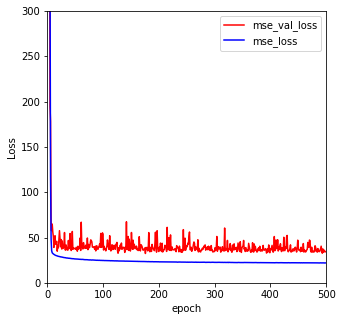

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32)                128       
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32)                128       
_________________________________________________________________
activation_17 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 2s 13ms/step - loss: 3452.9180 - val_loss: 3207.7839
Epoch 2/500
165/165 [==============================] - 1s 3ms/step - loss: 2867.9287 - val_loss: 2274.9009
Epoch 3/500
165/165 [==============================] - 2s 13ms/step - loss: 2113.7842 - val_loss: 1101.2292
Epoch 4/500
165/165 [==============================] - 2s 13ms/step - loss: 1294.6301 - val_loss: 773.8401
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 637.9351 - val_loss: 490.2017
Epoch 6/500
165/165 [==============================] - 2s 12ms/step - loss: 248.9526 - val_loss: 172.3377
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 87.9908 - val_loss: 96.2756
Epoch 8/500
165/165 [==============================] - 2s 13ms/step - loss: 42.8723 - val_loss: 59.5034
Epoch 9/500
165/165 [==============================] - 1s 3ms/step - loss: 34.2282 - val_loss: 44.6659
Epoch 10/500
165/165 [===========================

165/165 [==============================] - 2s 13ms/step - loss: 25.1133 - val_loss: 39.1602
Epoch 80/500
165/165 [==============================] - 1s 3ms/step - loss: 25.1801 - val_loss: 34.9922
Epoch 81/500
165/165 [==============================] - 2s 13ms/step - loss: 24.9906 - val_loss: 39.7508
Epoch 82/500
165/165 [==============================] - 2s 13ms/step - loss: 25.0552 - val_loss: 43.2557
Epoch 83/500
165/165 [==============================] - 0s 3ms/step - loss: 24.9509 - val_loss: 37.1919
Epoch 84/500
165/165 [==============================] - 2s 12ms/step - loss: 24.9452 - val_loss: 52.9904
Epoch 85/500
165/165 [==============================] - 1s 3ms/step - loss: 24.9106 - val_loss: 36.0062
Epoch 86/500
165/165 [==============================] - 2s 13ms/step - loss: 24.8578 - val_loss: 39.4002
Epoch 87/500
165/165 [==============================] - 1s 3ms/step - loss: 24.9205 - val_loss: 35.6622
Epoch 88/500
165/165 [==============================] - 2s 13ms/step - l

Epoch 157/500
165/165 [==============================] - 0s 3ms/step - loss: 23.6098 - val_loss: 36.7765
Epoch 158/500
165/165 [==============================] - 2s 13ms/step - loss: 23.6892 - val_loss: 37.4655
Epoch 159/500
165/165 [==============================] - 2s 13ms/step - loss: 23.6239 - val_loss: 35.5355
Epoch 160/500
165/165 [==============================] - 1s 3ms/step - loss: 23.5885 - val_loss: 47.5742
Epoch 161/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5613 - val_loss: 35.6568
Epoch 162/500
165/165 [==============================] - 1s 4ms/step - loss: 23.5488 - val_loss: 41.4859
Epoch 163/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5593 - val_loss: 41.6340
Epoch 164/500
165/165 [==============================] - 1s 3ms/step - loss: 23.5770 - val_loss: 36.9742
Epoch 165/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5765 - val_loss: 42.3827
Epoch 166/500
165/165 [===========================

165/165 [==============================] - 2s 13ms/step - loss: 22.8741 - val_loss: 33.5818
Epoch 235/500
165/165 [==============================] - 2s 13ms/step - loss: 22.7842 - val_loss: 37.0440
Epoch 236/500
165/165 [==============================] - 1s 4ms/step - loss: 22.7903 - val_loss: 41.7471
Epoch 237/500
165/165 [==============================] - 2s 13ms/step - loss: 22.8489 - val_loss: 44.9378
Epoch 238/500
165/165 [==============================] - 1s 3ms/step - loss: 22.8424 - val_loss: 37.3866
Epoch 239/500
165/165 [==============================] - 2s 13ms/step - loss: 22.9430 - val_loss: 35.9114
Epoch 240/500
165/165 [==============================] - 1s 3ms/step - loss: 22.7788 - val_loss: 36.5052
Epoch 241/500
165/165 [==============================] - 2s 13ms/step - loss: 22.8238 - val_loss: 36.9091
Epoch 242/500
165/165 [==============================] - 2s 13ms/step - loss: 22.8282 - val_loss: 38.5808
Epoch 243/500
165/165 [==============================] - 1s 3ms

165/165 [==============================] - 1s 3ms/step - loss: 22.3481 - val_loss: 45.5280
Epoch 312/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3499 - val_loss: 36.2365
Epoch 313/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3712 - val_loss: 37.9027
Epoch 314/500
165/165 [==============================] - 1s 4ms/step - loss: 22.4343 - val_loss: 36.6858
Epoch 315/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3381 - val_loss: 37.9236
Epoch 316/500
165/165 [==============================] - 1s 4ms/step - loss: 22.3191 - val_loss: 36.3790
Epoch 317/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3472 - val_loss: 36.6052
Epoch 318/500
165/165 [==============================] - 1s 3ms/step - loss: 22.3476 - val_loss: 41.6314
Epoch 319/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3432 - val_loss: 39.5720
Epoch 320/500
165/165 [==============================] - 2s 13ms

165/165 [==============================] - 1s 3ms/step - loss: 22.0523 - val_loss: 36.4742
Epoch 389/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0526 - val_loss: 39.9137
Epoch 390/500
165/165 [==============================] - 2s 12ms/step - loss: 22.0122 - val_loss: 38.5492
Epoch 391/500
165/165 [==============================] - 1s 3ms/step - loss: 22.0127 - val_loss: 40.6159
Epoch 392/500
165/165 [==============================] - 2s 13ms/step - loss: 21.9515 - val_loss: 37.7077
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 21.9679 - val_loss: 35.7484
Epoch 394/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0040 - val_loss: 37.2253
Epoch 395/500
165/165 [==============================] - 1s 3ms/step - loss: 22.0601 - val_loss: 36.9309
Epoch 396/500
165/165 [==============================] - 2s 13ms/step - loss: 21.9665 - val_loss: 36.7347
Epoch 397/500
165/165 [==============================] - 1s 3ms/

Epoch 466/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7921 - val_loss: 37.5309
Epoch 467/500
165/165 [==============================] - 2s 13ms/step - loss: 21.8127 - val_loss: 37.8143
Epoch 468/500
165/165 [==============================] - 1s 4ms/step - loss: 21.7484 - val_loss: 34.8092
Epoch 469/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7990 - val_loss: 37.4568
Epoch 470/500
165/165 [==============================] - 1s 3ms/step - loss: 21.8324 - val_loss: 35.6935
Epoch 471/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7324 - val_loss: 34.5359
Epoch 472/500
165/165 [==============================] - 1s 3ms/step - loss: 21.8692 - val_loss: 41.2118
Epoch 473/500
165/165 [==============================] - 2s 13ms/step - loss: 21.9254 - val_loss: 36.8386
Epoch 474/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7646 - val_loss: 34.3354
Epoch 475/500
165/165 [==========================

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.8598798268070376 
MAE:  4.695472886949465 
SD:  5.937861801646746


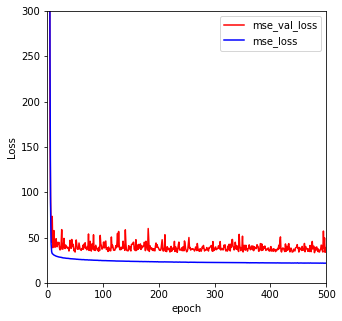

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32)                128       
_________________________________________________________________
activation_20 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32)                128       
_________________________________________________________________
activation_21 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 32)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 1s 4ms/step - loss: 3502.3987 - val_loss: 3445.6626
Epoch 2/500
165/165 [==============================] - 2s 13ms/step - loss: 2931.7859 - val_loss: 2811.6956
Epoch 3/500
165/165 [==============================] - 1s 3ms/step - loss: 2222.9656 - val_loss: 1737.2628
Epoch 4/500
165/165 [==============================] - 2s 13ms/step - loss: 1429.9371 - val_loss: 1254.0847
Epoch 5/500
165/165 [==============================] - 1s 3ms/step - loss: 739.5057 - val_loss: 411.8135
Epoch 6/500
165/165 [==============================] - 2s 13ms/step - loss: 318.0805 - val_loss: 233.1318
Epoch 7/500
165/165 [==============================] - 2s 13ms/step - loss: 121.9746 - val_loss: 58.1859
Epoch 8/500
165/165 [==============================] - 1s 3ms/step - loss: 54.1591 - val_loss: 63.5701
Epoch 9/500
165/165 [==============================] - 2s 13ms/step - loss: 37.0458 - val_loss: 67.8211
Epoch 10/500
165/165 [=========================

165/165 [==============================] - 1s 4ms/step - loss: 24.9796 - val_loss: 39.5816
Epoch 80/500
165/165 [==============================] - 2s 13ms/step - loss: 24.9533 - val_loss: 39.4239
Epoch 81/500
165/165 [==============================] - 1s 3ms/step - loss: 24.9371 - val_loss: 37.3623
Epoch 82/500
165/165 [==============================] - 2s 13ms/step - loss: 24.9326 - val_loss: 41.0978
Epoch 83/500
165/165 [==============================] - 2s 13ms/step - loss: 24.8570 - val_loss: 35.6852
Epoch 84/500
165/165 [==============================] - 1s 3ms/step - loss: 24.7954 - val_loss: 34.3499
Epoch 85/500
165/165 [==============================] - 2s 13ms/step - loss: 24.7963 - val_loss: 39.3361
Epoch 86/500
165/165 [==============================] - 0s 3ms/step - loss: 24.7821 - val_loss: 41.5907
Epoch 87/500
165/165 [==============================] - 2s 12ms/step - loss: 24.8390 - val_loss: 39.1250
Epoch 88/500
165/165 [==============================] - 1s 3ms/step - lo

Epoch 157/500
165/165 [==============================] - 1s 3ms/step - loss: 23.5979 - val_loss: 40.3361
Epoch 158/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5493 - val_loss: 41.1927
Epoch 159/500
165/165 [==============================] - 1s 3ms/step - loss: 23.4890 - val_loss: 34.6143
Epoch 160/500
165/165 [==============================] - 2s 13ms/step - loss: 23.4653 - val_loss: 47.7149
Epoch 161/500
165/165 [==============================] - 1s 3ms/step - loss: 23.5931 - val_loss: 35.2312
Epoch 162/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5098 - val_loss: 36.9736
Epoch 163/500
165/165 [==============================] - 1s 3ms/step - loss: 23.4661 - val_loss: 36.4641
Epoch 164/500
165/165 [==============================] - 2s 13ms/step - loss: 23.4929 - val_loss: 37.8621
Epoch 165/500
165/165 [==============================] - 2s 13ms/step - loss: 23.5130 - val_loss: 38.1706
Epoch 166/500
165/165 [===========================

165/165 [==============================] - 1s 3ms/step - loss: 22.8164 - val_loss: 50.1493
Epoch 235/500
165/165 [==============================] - 2s 13ms/step - loss: 22.8844 - val_loss: 34.9338
Epoch 236/500
165/165 [==============================] - 1s 3ms/step - loss: 22.7339 - val_loss: 34.9866
Epoch 237/500
165/165 [==============================] - 1s 4ms/step - loss: 22.8544 - val_loss: 35.2590
Epoch 238/500
165/165 [==============================] - 2s 13ms/step - loss: 22.7397 - val_loss: 35.3061
Epoch 239/500
165/165 [==============================] - 1s 3ms/step - loss: 22.7960 - val_loss: 36.4173
Epoch 240/500
165/165 [==============================] - 2s 13ms/step - loss: 22.8117 - val_loss: 49.1056
Epoch 241/500
165/165 [==============================] - 1s 3ms/step - loss: 22.7721 - val_loss: 35.3008
Epoch 242/500
165/165 [==============================] - 2s 13ms/step - loss: 22.7303 - val_loss: 35.6804
Epoch 243/500
165/165 [==============================] - 1s 3ms/s

165/165 [==============================] - 2s 13ms/step - loss: 22.3922 - val_loss: 38.6988
Epoch 312/500
165/165 [==============================] - 1s 3ms/step - loss: 22.3622 - val_loss: 37.1985
Epoch 313/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3555 - val_loss: 37.7127
Epoch 314/500
165/165 [==============================] - 1s 3ms/step - loss: 22.3684 - val_loss: 46.8555
Epoch 315/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3127 - val_loss: 37.6201
Epoch 316/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3533 - val_loss: 34.8449
Epoch 317/500
165/165 [==============================] - 1s 3ms/step - loss: 22.2748 - val_loss: 35.1126
Epoch 318/500
165/165 [==============================] - 2s 13ms/step - loss: 22.3163 - val_loss: 33.5297
Epoch 319/500
165/165 [==============================] - 1s 3ms/step - loss: 22.2530 - val_loss: 43.8644
Epoch 320/500
165/165 [==============================] - 2s 13ms

165/165 [==============================] - 1s 3ms/step - loss: 22.0192 - val_loss: 37.1062
Epoch 389/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0280 - val_loss: 35.8655
Epoch 390/500
165/165 [==============================] - 2s 13ms/step - loss: 21.9601 - val_loss: 35.0477
Epoch 391/500
165/165 [==============================] - 1s 3ms/step - loss: 22.0268 - val_loss: 33.7476
Epoch 392/500
165/165 [==============================] - 2s 13ms/step - loss: 22.0091 - val_loss: 47.6627
Epoch 393/500
165/165 [==============================] - 1s 3ms/step - loss: 21.9979 - val_loss: 34.7093
Epoch 394/500
165/165 [==============================] - 2s 12ms/step - loss: 22.0341 - val_loss: 40.6514
Epoch 395/500
165/165 [==============================] - 0s 3ms/step - loss: 22.0068 - val_loss: 41.8955
Epoch 396/500
165/165 [==============================] - 2s 12ms/step - loss: 21.9684 - val_loss: 36.9133
Epoch 397/500
165/165 [==============================] - 1s 3ms/

165/165 [==============================] - 2s 13ms/step - loss: 21.8391 - val_loss: 35.6692
Epoch 466/500
165/165 [==============================] - 1s 3ms/step - loss: 21.7937 - val_loss: 35.8039
Epoch 467/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7439 - val_loss: 37.3371
Epoch 468/500
165/165 [==============================] - 1s 3ms/step - loss: 21.8544 - val_loss: 34.9590
Epoch 469/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7950 - val_loss: 37.3692
Epoch 470/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7889 - val_loss: 34.9932
Epoch 471/500
165/165 [==============================] - 1s 3ms/step - loss: 21.7463 - val_loss: 32.8589
Epoch 472/500
165/165 [==============================] - 2s 13ms/step - loss: 21.7188 - val_loss: 40.1641
Epoch 473/500
165/165 [==============================] - 1s 3ms/step - loss: 21.8037 - val_loss: 38.0450
Epoch 474/500
165/165 [==============================] - 2s 13ms

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.29249394584290733 
MAE:  4.290874718599266 
SD:  5.808172036625007


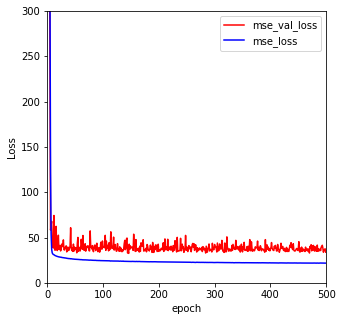

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.2946604296080587 
Ensemble_std:  5.827103959538362
